# Rice Crop disease identifier
This projects itends to assist farmers with identifying rice crop disease using Machine Learning model

## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import skimage
from skimage.io import imread,imshow
from skimage.feature import hog
from skimage.transform import rescale,resize

## Importing the dataset

In [2]:
src_path={'Bacterial Blight Disease':'Rice_Diseases/Bacterial Blight Disease',
'Blast Disease':'Rice_Diseases/Blast Disease',
'Brown Spot Disease':'Rice_Diseases/Brown Spot Disease',
'False Smut Disease':'Rice_Diseases/False Smut Disease',
'Tungro':'Rice_Diseases/Tungro'}

bacterial_blight=[]
blast=[]
brown_spot=[]
false_smut=[]
tungro=[]

for disease, path in src_path.items():
    for file in os.listdir(path):
        if disease=='Bacterial Blight Disease':
            bacterial_blight.append(os.path.join(path, file))
        if disease=='Blast Disease':
            blast.append(os.path.join(path, file))
        if disease=='Brown Spot Disease':
            brown_spot.append(os.path.join(path, file))
        if disease=='False Smut Disease':
            false_smut.append(os.path.join(path, file))
        if disease=='Tungro':
            tungro.append(os.path.join(path, file))

In [3]:
print(bacterial_blight)
print(blast)
print(brown_spot)
print(false_smut)
print(tungro)

['Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_001.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_002.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_003.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_004.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_005.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_006.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_007.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_008.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_009.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_010.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_011.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_012.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_013.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTERAILBLIGHT3_014.jpg', 'Rice_Diseases/Bacterial Blight Disease\\BACTER

In [4]:
print(len(bacterial_blight))
print(len(blast))
print(len(brown_spot))
print(len(false_smut))
print(len(tungro))

1654
1510
1650
50
1308


## Visualisation

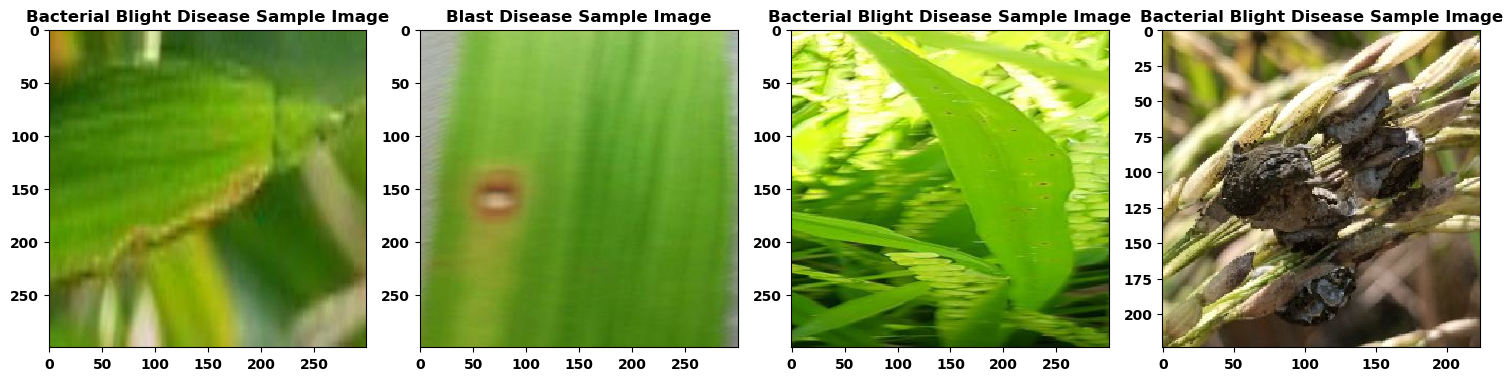

In [5]:
bacterial_sample_image=bacterial_blight[0]
blast_sample_image=blast[0]
brown_spot_sample_image=brown_spot[0]
false_smut_sample_image=false_smut[0]

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(bacterial_sample_image)

fig.add_subplot(1,4,2)
# plt.axis('off')
plt.title('Blast Disease Sample Image')
imshow(blast_sample_image)

fig.add_subplot(1,4,3)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(brown_spot_sample_image)

fig.add_subplot(1,4,4)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(false_smut_sample_image)

## Preprocess

In [6]:
combined_path_dataset=[]
for path in bacterial_blight:
    combined_path_dataset.append(path)

for path in blast:
    combined_path_dataset.append(path)

for path in brown_spot:
    combined_path_dataset.append(path)

for path in false_smut:
    combined_path_dataset.append(path)

for path in tungro:
    combined_path_dataset.append(path)

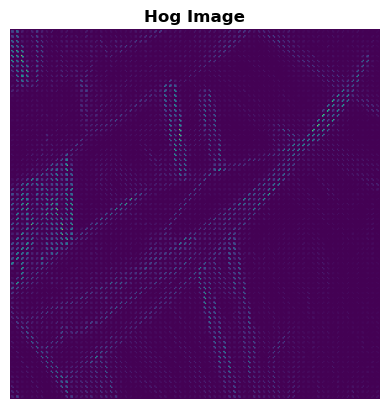

[0.09211254 0.         0.         ... 0.         0.         0.        ]
(2367488,)


In [7]:
path=combined_path_dataset[12]
image=imread(path,as_gray=True)
rescaled_image=resize(image,(200,200))
# dasify,daisified_image=daisy(rescaled_image,step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
# fig=plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
# imshow(rescaled_image)
# plt.subplot(1,2,2)
# imshow(image)
# print(dasify.shape)
hogify, hog_img = hog(
    image, orientations=8,
    pixels_per_cell=(4, 4),
    cells_per_block=(8,8),
    visualize=True
)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(hog_img)
ax.set_title(f"Hog Image")
plt.show()
print(hogify)
print(hogify.shape)

In [ ]:
print(len(combined_path_dataset))

In [ ]:
import pandas as pd
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
import os

batch_size = 10
i = 0

# Create the output directory if it does not exist
output_dir = 'dataset'
os.makedirs(output_dir, exist_ok=True)

# List to collect HOG features
hogified_images = []

for counter, path in enumerate(combined_path_dataset):
    # Read and process the image
    image = imread(path, as_gray=True)
    resized_image = resize(image, (200, 200))
    hogify = hog(resized_image, 
                 orientations=8,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(16, 16))
    
    # Append the HOG feature to the list
    hogified_images.append(hogify)

    # Save DataFrame to HDF5 after every batch_size images
    if (counter + 1) % batch_size == 0:
        df = pd.DataFrame({'img': hogified_images})
        df.to_hdf(os.path.join(output_dir, f'hogset_{i}.h5'), key='df', mode='w')
        hogified_images = []  # Reset the list for the next batch
        i += 1

# Save any remaining images after the loop
if hogified_images:
    df = pd.DataFrame({'img': hogified_images})
    df.to_hdf(os.path.join(output_dir, f'hogset_{i}.h5'), key='df', mode='w')


## Building Dataset and Training Model 

In [8]:

y_bb=[]
y_bd=[]
y_bs=[]
y_fs=[]
y_t=[]
y=[]
for i in range(0,len(bacterial_blight)):
    y_bb.append(1)

for i in range(0,len(blast)):
    y_bd.append(2)

for i in range(0,len(brown_spot)):
    y_fs.append(3)

for i in range(0,len(false_smut)):
    y_bs.append(4)

for i in range(0,len(tungro)):
    y_t.append(5)

In [9]:
y=y_bb+y_bd+y_fs+y_bs+y_t
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
mlpc = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', hidden_layer_sizes=(150, 150, 150), 
                         learning_rate='adaptive', max_iter=100, solver='adam', tol=1e-8, verbose=True, warm_start=True)
counter=10
ycounter=0
i=1
dataset_path=r'D:\IDEs\anaconda\envs\rice-disease\\dataset'
for file in os.listdir(r'D:\IDEs\anaconda\envs\rice-disease\\dataset'):
    if i<=616:
        print(f'Preocessing file {i}')
        i += 1
        dataset=pd.read_hdf(os.path.join(dataset_path,file))
        img_set=dataset['img']
        hog_set=[img for img in img_set]
        batch_y_set=y[ycounter*counter:ycounter*counter+10]
        counter=counter+1
        mlpc.fit(hog_set, batch_y_set)


Preocessing file 1
Iteration 1, loss = 0.60351993
Iteration 2, loss = 0.00740041
Iteration 3, loss = 0.00666699
Iteration 4, loss = 0.00604628
Iteration 5, loss = 0.00566599
Iteration 6, loss = 0.00550053
Iteration 7, loss = 0.00548215
Iteration 8, loss = 0.00555366
Iteration 9, loss = 0.00567646
Iteration 10, loss = 0.00582641
Iteration 11, loss = 0.00598879
Iteration 12, loss = 0.00615463
Iteration 13, loss = 0.00631850
Iteration 14, loss = 0.00647715
Iteration 15, loss = 0.00662866
Iteration 16, loss = 0.00677197
Iteration 17, loss = 0.00690657
Iteration 18, loss = 0.00703232
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 2
Iteration 1, loss = 0.00714929
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 3
Iteration 1, loss = 0.00680648
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 4
Iteration 1, loss = 0.006

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00006525
Iteration 2, loss = 0.00006025
Iteration 3, loss = 0.00005973
Iteration 4, loss = 0.00005927
Iteration 5, loss = 0.00005843
Iteration 6, loss = 0.00005722
Iteration 7, loss = 0.00005572
Iteration 8, loss = 0.00005403
Iteration 9, loss = 0.00005227
Iteration 10, loss = 0.00005058
Iteration 11, loss = 0.00004914
Iteration 12, loss = 0.00004808
Iteration 13, loss = 0.00004738
Iteration 14, loss = 0.00004669
Iteration 15, loss = 0.00004566
Iteration 16, loss = 0.00004441
Iteration 17, loss = 0.00004328
Iteration 18, loss = 0.00004240
Iteration 19, loss = 0.00004173
Iteration 20, loss = 0.00004117
Iteration 21, loss = 0.00004062
Iteration 22, loss = 0.00004003
Iteration 23, loss = 0.00003941
Iteration 24, loss = 0.00003877
Iteration 25, loss = 0.00003817
Iteration 26, loss = 0.00003764
Iteration 27, loss = 0.00003723
Iteration 28, loss = 0.00003689
Iteration 29, loss = 0.00003658
Iteration 30, loss = 0.00003623
Iteration 31, loss = 0.00003585
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00003291
Iteration 2, loss = 0.00003136
Iteration 3, loss = 0.00003118
Iteration 4, loss = 0.00003124
Iteration 5, loss = 0.00003120
Iteration 6, loss = 0.00003099
Iteration 7, loss = 0.00003067
Iteration 8, loss = 0.00003033
Iteration 9, loss = 0.00003006
Iteration 10, loss = 0.00002994
Iteration 11, loss = 0.00002994
Iteration 12, loss = 0.00002998
Iteration 13, loss = 0.00002990
Iteration 14, loss = 0.00002973
Iteration 15, loss = 0.00002955
Iteration 16, loss = 0.00002945
Iteration 17, loss = 0.00002942
Iteration 18, loss = 0.00002943
Iteration 19, loss = 0.00002942
Iteration 20, loss = 0.00002939
Iteration 21, loss = 0.00002932
Iteration 22, loss = 0.00002924
Iteration 23, loss = 0.00002917
Iteration 24, loss = 0.00002913
Iteration 25, loss = 0.00002912
Iteration 26, loss = 0.00002911
Iteration 27, loss = 0.00002907
Iteration 28, loss = 0.00002901
Iteration 29, loss = 0.00002893
Iteration 30, loss = 0.00002887
Iteration 31, loss = 0.00002882
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00002695
Iteration 2, loss = 0.00002662
Iteration 3, loss = 0.00002646
Iteration 4, loss = 0.00002639
Iteration 5, loss = 0.00002632
Iteration 6, loss = 0.00002621
Iteration 7, loss = 0.00002607
Iteration 8, loss = 0.00002592
Iteration 9, loss = 0.00002579
Iteration 10, loss = 0.00002571
Iteration 11, loss = 0.00002565
Iteration 12, loss = 0.00002562
Iteration 13, loss = 0.00002557
Iteration 14, loss = 0.00002551
Iteration 15, loss = 0.00002544
Iteration 16, loss = 0.00002539
Iteration 17, loss = 0.00002535
Iteration 18, loss = 0.00002533
Iteration 19, loss = 0.00002531
Iteration 20, loss = 0.00002529
Iteration 21, loss = 0.00002525
Iteration 22, loss = 0.00002521
Iteration 23, loss = 0.00002517
Iteration 24, loss = 0.00002513
Iteration 25, loss = 0.00002510
Iteration 26, loss = 0.00002507
Iteration 27, loss = 0.00002503
Iteration 28, loss = 0.00002499
Iteration 29, loss = 0.00002495
Iteration 30, loss = 0.00002490
Iteration 31, loss = 0.00002486
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00002260
Iteration 2, loss = 0.00002253
Iteration 3, loss = 0.00002246
Iteration 4, loss = 0.00002240
Iteration 5, loss = 0.00002234
Iteration 6, loss = 0.00002227
Iteration 7, loss = 0.00002220
Iteration 8, loss = 0.00002213
Iteration 9, loss = 0.00002206
Iteration 10, loss = 0.00002201
Iteration 11, loss = 0.00002196
Iteration 12, loss = 0.00002192
Iteration 13, loss = 0.00002188
Iteration 14, loss = 0.00002184
Iteration 15, loss = 0.00002181
Iteration 16, loss = 0.00002178
Iteration 17, loss = 0.00002176
Iteration 18, loss = 0.00002173
Iteration 19, loss = 0.00002171
Iteration 20, loss = 0.00002168
Iteration 21, loss = 0.00002166
Iteration 22, loss = 0.00002163
Iteration 23, loss = 0.00002161
Iteration 24, loss = 0.00002158
Iteration 25, loss = 0.00002156
Iteration 26, loss = 0.00002153
Iteration 27, loss = 0.00002150
Iteration 28, loss = 0.00002147
Iteration 29, loss = 0.00002144
Iteration 30, loss = 0.00002141
Iteration 31, loss = 0.00002138
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00001963
Iteration 2, loss = 0.00001959
Iteration 3, loss = 0.00001955
Iteration 4, loss = 0.00001951
Iteration 5, loss = 0.00001947
Iteration 6, loss = 0.00001943
Iteration 7, loss = 0.00001938
Iteration 8, loss = 0.00001934
Iteration 9, loss = 0.00001929
Iteration 10, loss = 0.00001926
Iteration 11, loss = 0.00001922
Iteration 12, loss = 0.00001919
Iteration 13, loss = 0.00001917
Iteration 14, loss = 0.00001914
Iteration 15, loss = 0.00001911
Iteration 16, loss = 0.00001909
Iteration 17, loss = 0.00001907
Iteration 18, loss = 0.00001905
Iteration 19, loss = 0.00001903
Iteration 20, loss = 0.00001901
Iteration 21, loss = 0.00001899
Iteration 22, loss = 0.00001897
Iteration 23, loss = 0.00001895
Iteration 24, loss = 0.00001892
Iteration 25, loss = 0.00001890
Iteration 26, loss = 0.00001888
Iteration 27, loss = 0.00001886
Iteration 28, loss = 0.00001884
Iteration 29, loss = 0.00001881
Iteration 30, loss = 0.00001879
Iteration 31, loss = 0.00001876
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00001718
Iteration 2, loss = 0.00001717
Iteration 3, loss = 0.00001716
Iteration 4, loss = 0.00001714
Iteration 5, loss = 0.00001712
Iteration 6, loss = 0.00001711
Iteration 7, loss = 0.00001709
Iteration 8, loss = 0.00001707
Iteration 9, loss = 0.00001705
Iteration 10, loss = 0.00001703
Iteration 11, loss = 0.00001701
Iteration 12, loss = 0.00001700
Iteration 13, loss = 0.00001698
Iteration 14, loss = 0.00001696
Iteration 15, loss = 0.00001694
Iteration 16, loss = 0.00001693
Iteration 17, loss = 0.00001691
Iteration 18, loss = 0.00001689
Iteration 19, loss = 0.00001688
Iteration 20, loss = 0.00001686
Iteration 21, loss = 0.00001684
Iteration 22, loss = 0.00001683
Iteration 23, loss = 0.00001681
Iteration 24, loss = 0.00001679
Iteration 25, loss = 0.00001678
Iteration 26, loss = 0.00001676
Iteration 27, loss = 0.00001674
Iteration 28, loss = 0.00001672
Iteration 29, loss = 0.00001670
Iteration 30, loss = 0.00001669
Iteration 31, loss = 0.00001667
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00001541
Iteration 2, loss = 0.00001540
Iteration 3, loss = 0.00001539
Iteration 4, loss = 0.00001538
Iteration 5, loss = 0.00001537
Iteration 6, loss = 0.00001536
Iteration 7, loss = 0.00001534
Iteration 8, loss = 0.00001533
Iteration 9, loss = 0.00001532
Iteration 10, loss = 0.00001531
Iteration 11, loss = 0.00001529
Iteration 12, loss = 0.00001528
Iteration 13, loss = 0.00001527
Iteration 14, loss = 0.00001525
Iteration 15, loss = 0.00001524
Iteration 16, loss = 0.00001523
Iteration 17, loss = 0.00001521
Iteration 18, loss = 0.00001520
Iteration 19, loss = 0.00001519
Iteration 20, loss = 0.00001518
Iteration 21, loss = 0.00001516
Iteration 22, loss = 0.00001515
Iteration 23, loss = 0.00001514
Iteration 24, loss = 0.00001512
Iteration 25, loss = 0.00001511
Iteration 26, loss = 0.00001509
Iteration 27, loss = 0.00001508
Iteration 28, loss = 0.00001507
Iteration 29, loss = 0.00001505
Iteration 30, loss = 0.00001504
Iteration 31, loss = 0.00001502
Iteration 32, los

d:\IDEs\anaconda\envs\rice-disease\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.00001401
Iteration 2, loss = 0.00001401
Iteration 3, loss = 0.00001400
Iteration 4, loss = 0.00001399
Iteration 5, loss = 0.00001399
Iteration 6, loss = 0.00001398
Iteration 7, loss = 0.00001397
Iteration 8, loss = 0.00001396
Iteration 9, loss = 0.00001395
Iteration 10, loss = 0.00001394
Iteration 11, loss = 0.00001393
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 19
Iteration 1, loss = 0.00001393
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 20
Iteration 1, loss = 0.00001393
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 21
Iteration 1, loss = 0.00001392
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Preocessing file 22
Iteration 1, loss = 0.00001391
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Pre

ValueError: Found input variables with inconsistent numbers of samples: [2, 10]

In [ ]:
import os
import pandas as pd

# Initialize variables
eval_df = pd.DataFrame(columns=['ypred', 'ytest'])
counter = 10
ycounter = 0
i = 0  # Starting index for file processing
dataset_path = r'D:\IDEs\anaconda\envs\rice-disease\dataset'

# Placeholder for actual labels and model
# mlpc = ...  # Your model initialization
# y = ...  # Your ground truth labels

for file in os.listdir(dataset_path):
    i += 1
    if i > 494:  # Process files with index greater than 494
        print(f'Processing file {i}')
        try:
            dataset = pd.read_hdf(os.path.join(dataset_path, file))
            img_set = dataset['img']
            hog_set = [img for img in img_set]
            batch_y_set = y[ycounter * counter:ycounter * counter + counter]
            print(f'ytrain for this set is: {batch_y_set}' )
            # Check if batch_y_set and hog_set have the same length
            if len(batch_y_set) != len(hog_set):
                print(f'Length mismatch in file {file}: {len(batch_y_set)} != {len(hog_set)}')
                continue
            
            ypred = mlpc.predict(hog_set)
            print(f'ytrain for this set is: {ypred}' )
            temp_eval_df = pd.DataFrame({'ypred': ypred, 'ytest': batch_y_set})
            eval_df = pd.concat([eval_df, temp_eval_df], ignore_index=True)
            
            # Update counter and ycounter
            ycounter += 1
            
        except Exception as e:
            print(f'Error processing file {file}: {e}')

print('Processing complete.')


In [ ]:
eval_df

In [ ]:
print(eval_df.isna().sum())
print(eval_df.value_counts())

In [ ]:
mlpc_ypred=np.array(eval_df['ypred'])
mlpc_ytest=np.array(eval_df['ytest'])
print(type(mlpc_ytest),type(mlpc_ypred))
print(accuracy_score(mlpc_ypred,mlpc_ytest))

## Deploying the model

In [ ]:
joblib.dump(mlpc,open('model.pkl','wb'))